# Question 4: Linear Air Drag

## Importing Packages

In [117]:
# Import the packages needed
import numpy as np
import matplotlib.pyplot as plt

## Solving the problem numerically

### The Dynamics
##### Defining the constants of the problem

Given the parameters of the problem, define an intrinsic unit of time $\tau$ and an intrisic unit of velocity $v_t$ and compute their values below.

In [118]:
##### CONSTANTS (Do not edit) #####

m = 1       # The mass of the ball
b = 0.3     # The coefficient of the linear drag force
g = 9.8     # The acceleration due to gravity in m/s

tau = m/b   # <=== Define the natural time-scale of the problem in terms of the above parameters
vt = g*m/b  # <=== Define the natural velocity-scale of the problem in terms of the above parameters

##### Defining the dynamics (the acceleration) from Newton's Laws

In the following cell, define a function `a(y,v)` which accepts both the $y$ position of the object and its $y$ velocity, and returns the instantaneous acceleration.

In [119]:
### EXERCISE: Define an acceleration function ###
def a(y,v):
    return -g - b/m * v

### The Kinematics

##### Setting the initial conditions

Consider the situation where the object starts falling from rest from an initial position $y_0 = 100\,m$ at $t=0$. You are required to track the object for 20 seconds.

In the following cell, define the initial and final times. Then choose a value of the time step $dt \approx 1$, as well as the total number of time-steps $N$. Make sure you also define the initial conditions $y_0$ and $v_0$ from the information given above.

In [120]:
### EXERCISE: Define the initial conditions for the kinematics ###
t_initial = 0
t_final   = 10
dt = 1
t_list = np.arange(dt/2, t_final, dt)
N = len(t_list)

y0 = 100 * m
v0 = 0

##### Defining the arrays to store data and the leapfrog method

In the cell below, define the arrays to store the data of your simulation. Initialise the arrays using the leapfrog method.

In [121]:
### EXERCISE: Define the arrays to store data ###
t = np.zeros(N, float)
y = np.zeros(N, float)
v = np.zeros(N, float)

### EXERCISE: Initialise the arrays using the leapfrog method ###
v[0] = v0
y[0] = y0

##### Solving the kinematics

In the following cell, define a loop over $N$ time-steps which solves the kinematics of the problem, incrementing the position and velocity at every step.

In [122]:
### EXERCISE: Define a loop to solve the kinematics ###
for i in range(1, N):
    accel = a(y[i-1], v[i-1])
    v[i]  = v[i-1] + accel * dt
    y[i]  = y[i-1] + v[i] * dt

### Plotting the solution

At the end of the previous section, you should have arrays of position, velocity, and time. To analyse your solution, you are now expected to:

1. Plot the position as a function of time (label your axes)
2. Plot the velocity as a function of time (label your axes)

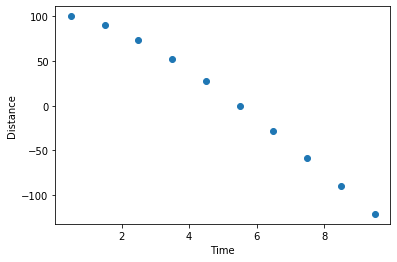

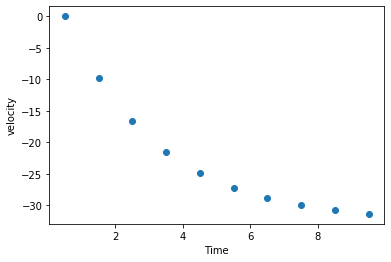

In [123]:
### EXERCISE: Plot the coordinate as a function of time ###

plt.scatter(t_list,y) # <=== Insert lines to plot the y-position against time with axes labels
plt.xlabel('Time')
plt.ylabel('Distance')

plt.savefig('../figs/position-time.png')
plt.show()

### EXERCISE: Plot the velocity as a function of time ###

plt.scatter(t_list,v) # <=== Insert lines to plot the y-velocity against time with axes labels
plt.xlabel('Time')
plt.ylabel('velocity')

plt.savefig('../figs/velocity-time.png')
plt.show()

## Testing your solution

We will now try to compare your solution with the "exact" solution. Theoretically, we know that the solution to this differential equation for velocity is $$v(t) = v_t \left( 1 - e^{-t/\tau}\right).$$ You will now plot this solution as well as the solutions for different values of $dt$ on the same graph to compare.

We will begin by defining a function called `test_dt(dt)` which accepts a variable $(dt)$ and which computes the solution for this value of `dt`, and plots a **scatter** plot of it. (It will not return anything, it will just print out a plot.) In the following cell, define such a function.

**Note:** Remember to take into consideration *all* the variables in your program which depend on $dt$!


In [131]:
### EXERCISE: Define a function `test_dt` which computes the solution for a given dt ###

def test_dt(dt):
              # <== Fill this function in to compute the velocity as a function of time, given dt,
              #     and plot a scatter plot of the result.
    dt = dt
    t = np.arange(t_initial, t_final, dt)
    N = len(t)
    y = np.zeros(N, float)
    v = np.zeros(N, float)
    
    y[0] = y0
    v[0] = v0
             
    
    for i in range(1,len(t)):
        accel = a(y[i-1], v[i-1])
        v[i] = v[i-1] + accel * dt
        y[i] = y[i-1] + v[i-1] * dt
        
    fig, ax = plt.subplots()
    # Take absolute value of v to compare magnetude with analytic solution
    ax.scatter(t,np.abs(v), label='dt = {}'.format(dt))
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Velocity')
    
    return fig, ax

In the following cell, you will define the analytic solution. 

Find a way to plot the analytic solution. 

Once this is done, call the `test_dt` function with the given values of $dt$ below.

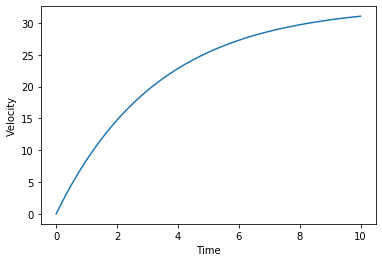

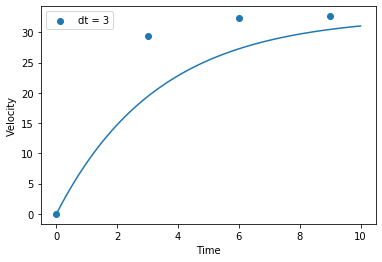

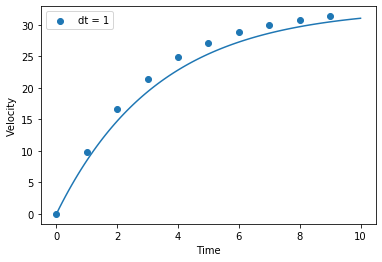

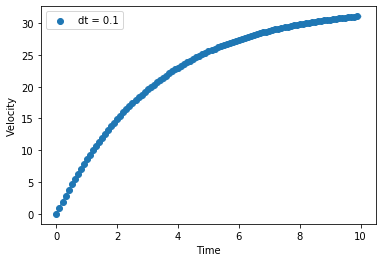

In [132]:
### EXERCISE: Find a way to plot the exact solution as a continuous line plot with appropriate axes ###
T = np.linspace(t_initial, t_final, 100)
V = vt * (1 - np.exp(-T/tau))

plt.plot(T, V)
plt.xlabel('Time')
plt.ylabel('Velocity')

### EXERCISE: Call the `test_dt` function for the following values of dt ###

fig, ax = test_dt(3)
ax.plot(T, V)
fig.savefig('../figs/velocity-time-3dt.png')
fig, ax = test_dt(1)
ax.plot(T, V)
fig.savefig('../figs/velocity-time-1dt.png')
fig, ax = test_dt(0.1)
ax.plot(T, V)
fig.savefig('../figs/velocity-time-0.1dt.png')


The function follows an exponential decay, as it's expected of a differential equation of the form $y^\prime = -y(x)$. Since $\ddot x = -\frac{b}{m} \dot x$, we can replace $\dot x$ with $v$, and get $\dot v = -\frac{b}{m} v$